Schreiben Sie ein Programm, dass die Python Funktion ```solve_ivp()``` des Moduls ```scipy.integrate``` verwendet, um das im folgenden geschilderte Anfangswertproblem zu lösen.

Wir betrachten einen Oszillator mit einem nichtlinearen Dämpfungsterm:
\begin{equation}
  \ddot{x} - \mu (1 - x^2)\dot{x} + x = 0 \, .
\end{equation}

### Teil 1

* Berechnen und plotten Sie $x(t)$ für die Anfangsbedinungungen $x(0) = 2.5$ und $\dot{x}(0) = 0$ im Intervall $t=0$ bis $t=150$.
* Geben Sie weder Ausgabezeitpunkte, gewünschte Genauigkeit oder den Algorithmus vor.
* Für $\mu=0$ sollten Sie eine harmonische Oszillation erhalten. 
* Variieren Sie $\mu$ im Bereich [0,10].
* Plotten Sie zusätzlich zum $x(t)$ Diagramm den Phasenraum $(x(t), \dot{x}(t))$ (Vorschlag als subplot).
  Schauen Sie sich dies abermals für verschiedene $\mu$ Werte an.
  
Welche Eigenschaften des Oszillators erkennen Sie?

### Teil 2

Die ```solve_ivp()``` Routine wählt ihre Zeitschrittweite von selbst über die eingebaute Schrittweitensteuerung. Nun wollen wir
sichtbar machen, zu welchem Zeitpunkt welche Zeitschrittweite gewählt wurde. Berechnen Sie daher die Differenzen der aufeinander folgenden
Einträge des von ```solve_ivp```zurückgegebenen Arrays der Ausgabezeiten. Hieraus können Sie einen Plot erstellen, der die Zeitschrittweite $\Delta t$
als Funktion von $t$ zeigt.

* Erstellen Sie eine Figur, die im oberen Subplot die Lösung $x(t)$ und im unteren Subplot $\Delta t(t)$ zeigt. 
* Experimentieren Sie wieder einmal mit verschiedenen $\mu$-Werten und untersuchen Sie wo die Schrittweite wie angepasst wird erhöhen Sie gleichzeitig
  die Qualität der Lösung durch verringern der relativen Toleranz ```rtol```.
* Erweitern Sie Ihr numerisches Experiment, in dem Sie zwischen verschiedenen Lösungsalgorithmen umschalten:
    * method = 'Radau' / 'DOP853' / 'BDF' / 'LSODA' / 'RK23' / 'RK45
  Sie können sich zusätzlich die Anzahl an Funktionsauswertungen der Funktion $f(t,y)$ die das DGL System beschreibt anzeigen lassen. Geben Sie dazu
  die Variable ```fnev```des von ```solve_ivp``` zurückgegebenen Objekts aus.

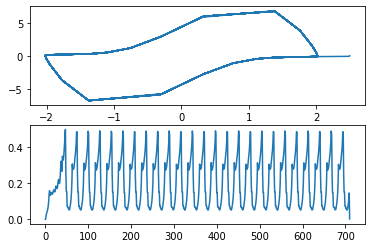

In [64]:
from scipy.integrate import solve_ivp
import numpy as np 
import matplotlib.pyplot as plt


y0 = [2.5,0]
t_span = (0.0,150)
tau = np.linspace(0.0, 150, 100)


def f(t,y, mu):
    dy1 = y[1]
    dy2 = mu*(1-y[0]**2)*y[1] -y[0]
    return [dy1,dy2]

mu= 5
p = (mu,)
Sol = solve_ivp(f,t_span, y0,method = 'RK45' ,args=p)

y1 = Sol.y[0,:]
y2 = Sol.y[1,:]
t = Sol.t
dt = np.diff(t)

plt.subplot(2,1,1)
plt.plot(y1,y2)

plt.subplot(2,1,2)
plt.plot(dt)
plt.show()